# Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import unicodedata
import re
import seaborn as sns
import acquire

# Exercises


Do your work for this exercise in a file named explore.

1. Spam Data

- a. Load the spam data set.
- b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
- c. Is there any overlap in the bigrams for the spam data and the ham data?
- d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

2. Explore the blog articles using the techniques discussed in the exploration lesson.

3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

# 1. Spam Data

- a. Load the spam data set.

In [43]:
#setting parameters for visuals
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [44]:
#Clean text function
def clean(text):
    '''Simplified text cleaning function'''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

In [45]:
#Reading in .csv file and creating dataframe
df = pd.read_csv('./spam_clean.csv')
print(df.shape)
df.head()

(5572, 2)


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [46]:
df = pd.read_csv('./spam_clean.csv')
print(df.shape)
df.head()

(5572, 2)


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [47]:
#creating list of strings for each label
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [48]:
#gives us the frequency of each word
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [49]:
#concating all of the pandas series created above into one dataframe
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['ham', 'spam', 'all']
word_counts.head()

,ham,spam,all
i,2305,45,2350
you,1837,287,2124
to,1554,686,2240
the,1118,204,1322
a,1055,376,1431


In [50]:
#Most frequent word
word_counts.sort_values('all', ascending=False).head(30)

,ham,spam,all
i,2305,45,2350
to,1554,686,2240
you,1837,287,2124
a,1055,376,1431
the,1118,204,1322
u,986,147,1133
and,848,122,970
is,728,158,886
in,811,73,884
me,756,30,786


In [51]:
#Looking at most frequent word in spam but not ham 
word_counts.sort_values(['spam', 'ham'], ascending=[True, False]).head(30)

,ham,spam,all
ltgt,276,0,276
he,184,0,184
lor,160,0,160
later,134,0,134
da,131,0,131
she,130,0,130
thats,94,0,94
say,91,0,91
ask,88,0,88
said,86,0,86


In [52]:
#Most frequent word in ham
word_counts.sort_values('ham', ascending=False).head(30)

,ham,spam,all
i,2305,45,2350
you,1837,287,2124
to,1554,686,2240
the,1118,204,1322
a,1055,376,1431
u,986,147,1133
and,848,122,970
in,811,73,884
me,756,30,786
my,743,10,753


- b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

**Visualization**

Text(0.5, 1.0, 'Spam counts for the top 20 most frequent words')

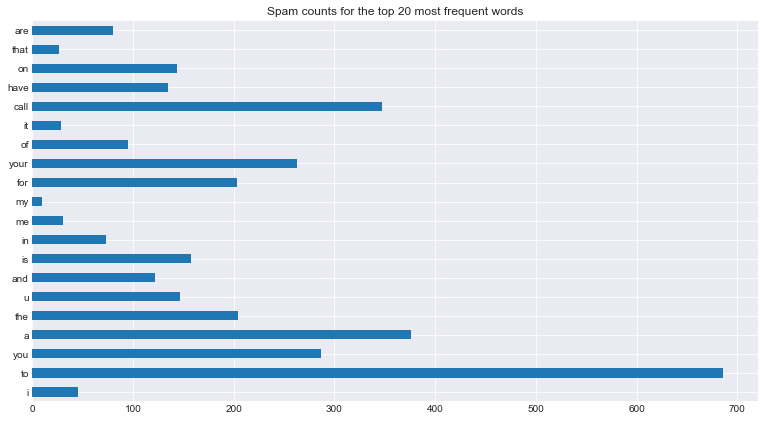

In [53]:
#ham count for 20 most common words
word_counts.sort_values('all', ascending= False).head(20)['spam'].plot.barh()
plt.title( "Spam counts for the top 20 most frequent words")

Text(0.5, 1.0, 'Ham vs Spam counts for the top 20 most frequent words')

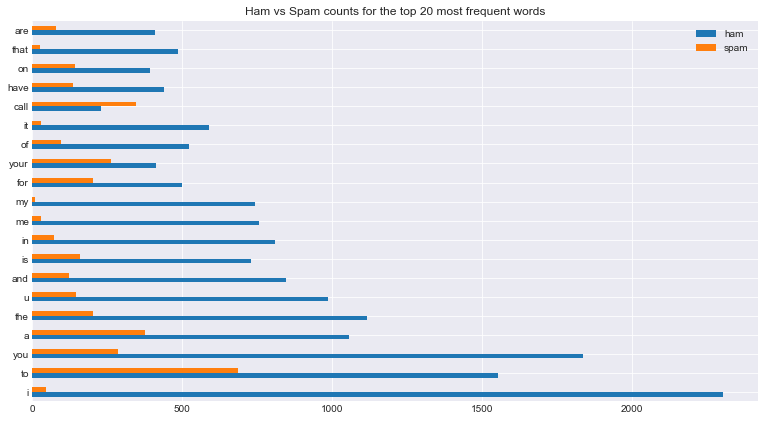

In [54]:
# ham vs spam count for 20 most common words
# ham vs spam proportion for 20 most common words
word_counts.sort_values('all', ascending= False).head(20)[['ham', 'spam']].plot.barh()
plt.title( "Ham vs Spam counts for the top 20 most frequent words")

- Spam and Ham have the same top 20 most frequent words except spam has a higher count in each category than ham.

(-0.5, 799.5, 599.5, -0.5)

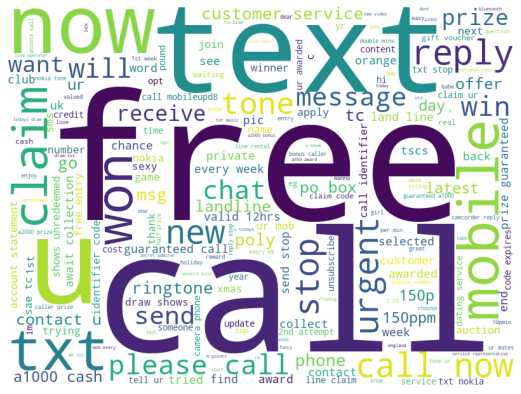

In [55]:
#word cloud for spam words
from wordcloud import WordCloud

img = WordCloud(background_color='white', width=800, height=600).generate(spam_words)
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

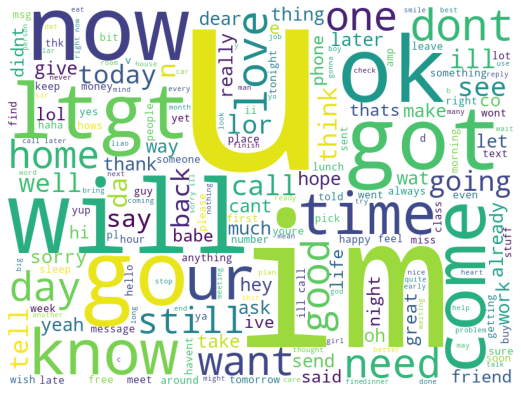

In [56]:
#word cloud for ham words
img = WordCloud(background_color='white', width=800, height=600).generate(ham_words)
plt.imshow(img)
plt.axis('off')

- At first glance in the word cloud you see similar words such as now, call, and go.

- c. Is there any overlap in the bigrams for the spam data and the ham data?

In [57]:
# To produce the bigrams, we'll use nltk
#code below only gives list of bigrams with no counts for ham_words
# bigrams_ham = nltk.ngrams(ham_words.split(), 2)

# list(bigrams_ham)

In [58]:
# To produce the bigrams, we'll use nltk
# bigrams_spam = nltk.ngrams(spam_words.split(), 2)
# list(bigrams_spam)

In [59]:
# We can apply the same transformation to our ham data set in order to find out which bigrams are the most frequently occuring.
top_20_ham_bigrams = (pd.Series(nltk.ngrams(ham_words.split(), 2))
                      .value_counts())

top_20_ham_bigrams.head()

(are, you)    173
(i, am)       132
(have, a)     110
(i, will)      98
(do, you)      91
dtype: int64

In [60]:
# We can apply the same transformation to our spam data set in order to find out which bigrams are the most frequently occuring.
top_20_spam_bigrams = (pd.Series(nltk.ngrams(spam_words.split(), 2))
                      .value_counts())

top_20_spam_bigrams.head()

(you, have)       73
(have, won)       54
(your, mobile)    49
(to, claim)       46
(please, call)    44
dtype: int64

## Answer:
- There is not an exact overlap of bigram pairs but there is an overlap in individual words such as you, I, have, and are.

- d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [61]:
# We can apply the same transformation to our ham data set in order to find out which trigrams are the most frequently occuring.
top_20_ham_triigrams = (pd.Series(nltk.ngrams(ham_words.split(), 3))
                      .value_counts())

top_20_ham_triigrams.head()

(ill, call, later)    39
(sorry, ill, call)    38
(how, are, you)       35
(i, want, to)         29
(let, me, know)       26
dtype: int64

In [62]:
# We can apply the same transformation to our spam data set in order to find out which trigrams are the most frequently occuring.
top_20_spam_trigrams = (pd.Series(nltk.ngrams(spam_words.split(), 3))
                      .value_counts())

top_20_spam_trigrams.head()

(you, have, won)             37
(have, won, a)               33
(prize, guaranteed, call)    21
(a1000, cash, or)            19
(to, contact, u)             18
dtype: int64

# 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [74]:
def clean_extra(string):
    'A simple function to cleanup text data'
    #lemmatize text
    wnl = nltk.stem.WordNetLemmatizer()
    #stating what stopwords are
    stopwords = nltk.corpus.stopwords.words('english') 
    #normlalizing string, encoding it to ascii for removal of nonascii,
    #then decoding to change byte object back to string
    string = (unicodedata.normalize('NFKD', string)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    #splitting the string into individual words
    words = re.sub(r'[^\w\s]', '', string).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [75]:
#acquire blog data
Codeup_blog_df= acquire.acquire_codeup_blog()

/Users/linhquach/Desktop/codeup-data-science/natural-language-processing-exercises/acquire.py:16: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 16 of the file /Users/linhquach/Desktop/codeup-data-science/natural-language-processing-exercises/acquire.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)


In [76]:
#Look at values
Codeup_blog_df

,title,published_date,blog_image,content
0,Codeup’s Data Science Career Accelerator is Here!,"September 30, 2018",https://codeup.com/wp-content/uploads/2018/10/...,The rumors are true! The time has arrived. Cod...
1,Data Science Myths,"October 31, 2018",https://codeup.com/wp-content/uploads/2018/10/...,By Dimitri Antoniou and Maggie Giust\nData Sci...
2,Data Science VS Data Analytics: What’s The Dif...,"October 17, 2018",https://codeup.com/wp-content/uploads/2018/10/...,"By Dimitri Antoniou\nA week ago, Codeup launch..."
3,10 Tips to Crush It at the SA Tech Job Fair,"August 14, 2018",None,SA Tech Job Fair\nThe third bi-annual San Anto...
4,Competitor Bootcamps Are Closing. Is the Model...,"August 14, 2018",None,Competitor Bootcamps Are Closing. Is the Model...


In [77]:
# Putting title words and content words into a list
title_words = clean_extra(' '.join((Codeup_blog_df.title)))
content_words = clean_extra( ' '.join((Codeup_blog_df.content)))

In [84]:
#looking at datatype
type(title_words)

list

In [81]:
#Once we have a list of words, we can transform it into a pandas Series, which we can then use to show us how 
# often each of the words occurs.
title_freq = pd.Series(title_words).value_counts()
content_freq = pd.Series(content_words).value_counts()

In [82]:
#concating title freq and content freq
blog_word_counts = (pd.concat([title_freq, content_freq], axis=1, sort=True)
                .set_axis(['title', 'content'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

blog_word_counts.head(10)

,title,content
1,0,3
10,1,3
10th,0,1
11,0,1
12,0,1
13,0,2
14,0,2
15,0,1
18,0,1
18th,0,1


In [83]:
#Most frequent word in content
blog_word_counts .sort_values('content', ascending=False).head(30)

,title,content
data,4,75
science,3,26
learning,0,20
company,0,20
job,1,14
machine,0,14
scientist,0,13
like,0,12
model,1,12
education,0,10


In [88]:
#Changing title words and content words to a string
title_word_str = ' '.join(title_words)
content_word_str = ' '.join(content_words)

In [91]:
title_word_str

'codeups data science career accelerator data science myth data science v data analytics whats difference 10 tip crush sa tech job fair competitor bootcamps closing model danger'

(-0.5, 799.5, 599.5, -0.5)

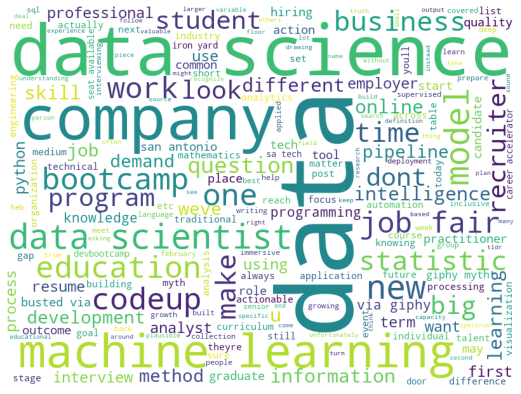

In [89]:
from wordcloud import WordCloud

img = WordCloud(background_color='white', width=800, height=600).generate(content_word_str)
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

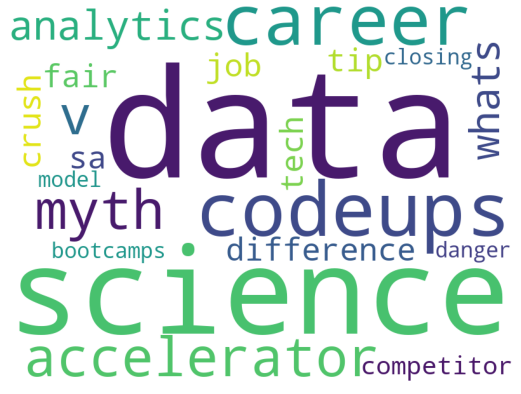

In [90]:
from wordcloud import WordCloud

img = WordCloud(background_color='white', width=800, height=600).generate(title_word_str)
plt.imshow(img)
plt.axis('off')

# 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [93]:
categories = ['business', 'sports', 'technology', 'entertainment']
news_df = acquire.get_all_news_articles(categories)

/Users/linhquach/Desktop/codeup-data-science/natural-language-processing-exercises/acquire.py:92: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 92 of the file /Users/linhquach/Desktop/codeup-data-science/natural-language-processing-exercises/acquire.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)


In [95]:
#Looking at first 5 values
news_df.head()

,title,content,category
0,Customers of banks under moratorium to get ₹5 ...,Finance Minister Nirmala Sitharaman announced ...,business
1,"₹3 lakh fine on Shilpa, Raj & his firm by SEBI...",Securities and Exchange Board of India (SEBI) ...,business
2,Why not Kabaddi? Mahindra after '3x3 Basketbal...,Mahindra Group's Chairman Anand Mahindra on We...,business
3,This information isn't collected by govt: FM o...,"Finance Minister Nirmala Sitharaman replied ""t...",business
4,Old video of people laughing as Bezos talks ab...,An old video of Amazon Founder Jeff Bezos has ...,business


In [97]:
#Looking to value counts of each category
news_df.category.value_counts()

entertainment    24
business         24
technology       24
sports           23
Name: category, dtype: int64

In [100]:
#creating lists for content
business_content = clean_extra(' '.join(news_df[news_df.category == 'business'].content))
entertainment_content = clean_extra(' '.join(news_df[news_df.category == 'entertainment'].content))
sports_content = clean_extra(' '.join(news_df[news_df.category == 'sports'].content))
technology_content = clean_extra(' '.join(news_df[news_df.category == 'technology'].content))

In [101]:
#creating strings for content
business_content_str = ' '.join(business_content)
entertainment_content_str = ' '.join(entertainment_content)
sports_content_str = ' '.join(sports_content)
technology_content_str = ' '.join(technology_content)

In [104]:
# creating lists for title
business_title = clean_extra(' '.join(news_df[news_df.category == 'business'].title))
entertainment_title = clean_extra(' '.join(news_df[news_df.category == 'entertainment'].title))
sports_title = clean_extra(' '.join(news_df[news_df.category == 'sports'].title))
technology_title = clean_extra(' '.join(news_df[news_df.category == 'technology'].title))

type(business_title)

list

In [105]:
#creating strings for title
business_title_str = ' '.join(business_title)
entertainment_title_str = ' '.join(entertainment_title)
sports_title_str = ' '.join(sports_title)
technology_title_str = ' '.join(technology_title)

In [108]:
#Once we have a list of words, we can transform it into a pandas Series, which we can then use to show us how 
# often each of the words occurs.
business_title_freq = pd.Series(business_title_str.split()).value_counts()
entertainment_title_freq = pd.Series(entertainment_title_str.split()).value_counts()
sports_title_freq = pd.Series(sports_title_str.split()).value_counts()
technology_title_freq = pd.Series(technology_title_str.split()).value_counts()

In [109]:
#Once we have a list of words, we can transform it into a pandas Series, which we can then use to show us how 
# often each of the words occurs.
business_content_freq = pd.Series(business_content_str.split()).value_counts()
entertainment_content_freq = pd.Series(entertainment_content_str.split()).value_counts()
sports_content_freq = pd.Series(sports_content_str.split()).value_counts()
technology_content_freq = pd.Series(technology_content_str.split()).value_counts()

In [110]:
title_word_counts = pd.concat([business_title_freq, entertainment_title_freq, sports_title_freq, technology_title_freq], axis=1).fillna(0).astype(int)
title_word_counts.columns = ['business', 'entertainment', 'sports', 'technology']
title_word_counts.head()

,business,entertainment,sports,technology
bank,4,0,0,1
govt,4,0,0,1
ipo,3,0,0,0
day,3,0,0,1
sebi,3,1,0,0


In [111]:
content_word_counts = pd.concat([business_content_freq, entertainment_content_freq, sports_content_freq, technology_content_freq], axis=1).fillna(0).astype(int)
content_word_counts.columns = ['business', 'entertainment', 'sports', 'technology']
content_word_counts.head()

,business,entertainment,sports,technology
said,21,25,4,14
crore,16,0,0,0
bank,13,0,0,2
company,10,2,0,4
india,9,1,10,1


(-0.5, 799.5, 599.5, -0.5)

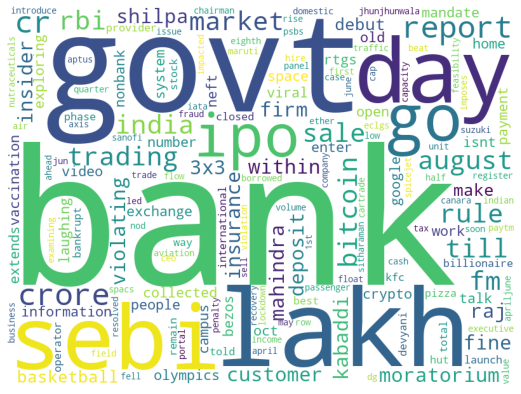

In [112]:
# business_title wordcloud
from wordcloud import WordCloud

img = WordCloud(background_color='white', width=800, height=600).generate(business_title_str)
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

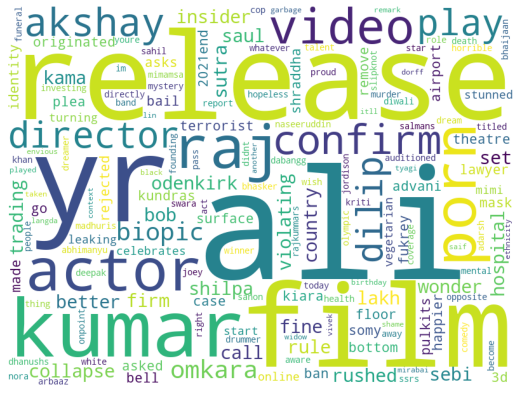

In [113]:
# entertainment_title wordcloud
from wordcloud import WordCloud

img = WordCloud(background_color='white', width=800, height=600).generate(entertainment_title_str)
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

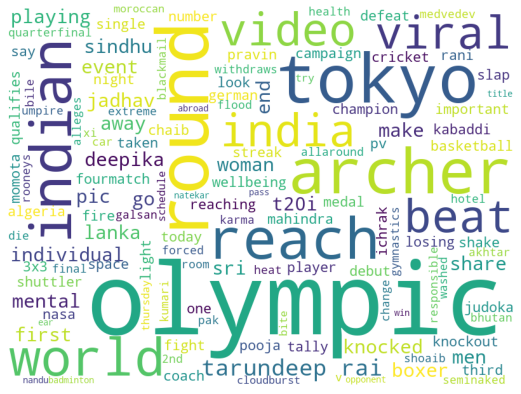

In [114]:
# sports_title wordcloud
from wordcloud import WordCloud

img = WordCloud(background_color='white', width=800, height=600).generate(sports_title_str)
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

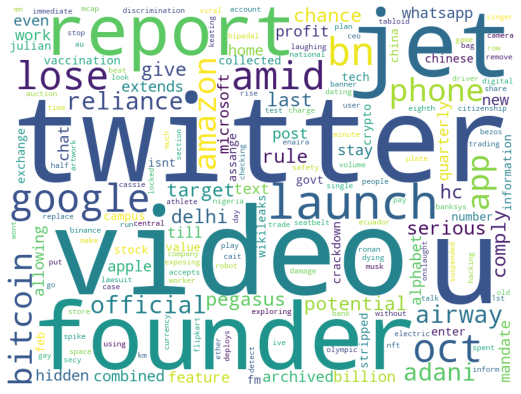

In [115]:
# technology_title wordcloud
from wordcloud import WordCloud

img = WordCloud(background_color='white', width=800, height=600).generate(technology_title_str)
plt.imshow(img)
plt.axis('off')